### Introduction

- Goal: To compare the performance of a decision tree vs. a random forest models 
- Dataset: It contains information pertaining to NY State High School graduation metrics for the 2018-2019 school year
https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M11_Data.csv
- Steps: 
1. Import the datset from github repository and do EDA
2. Create a new categorical indicator variable derived from the content of the reg_pct attribute
3. Remove the “reg_pct” and “reg_cnt” attributes from your dataframe.
4. Analyze the distribution of the newly created “reg_pct_level” indicator value
5. Select explanatory and response Variable for modeling 
6. Split the data into training and testing subsets, use the training subset to construct two different decision tree models and two different random forest models 
7. Use different metrics to compare/contrast the models
8. Conclusion

In [175]:
# load the pandas library
import pandas as pd
import numpy as np
#importing required libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# importing dataset from github. 
# This data set contains information pertaining to NY State High School graduation metrics for the 2018-2019 school year
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M11_Data.csv"
df = pd.read_csv(filename)
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


### Exploratory Data Analysis, Data Preparation, Prepped Data Review 

In [176]:
# checking datatype and null values of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

In [177]:
df.isin(['-']).sum(axis=0) #checking # of "-" values in dataset

report_school_year        0
aggregation_index         0
aggregation_type          0
aggregation_name          0
nrc_code                  0
nrc_desc                  0
county_code               0
county_name               0
nyc_ind                   0
membership_desc           0
subgroup_code             0
subgroup_name             0
enroll_cnt            33478
grad_cnt              33478
grad_pct              33478
reg_cnt               33478
reg_pct               33478
dropout_cnt           33478
dropout_pct           33478
dtype: int64

Firstly removing rows containing "-" value  then converting % columns into float 

In [178]:
df= df[df["enroll_cnt"].str.contains("-")==False] #removed rows containing "-". Rows reduced from 73152 to 39674

In [179]:
df['reg_pct'] = df['reg_pct'].str.rstrip('%').astype("float") #removing % and converting column to float

In [180]:
df['grad_pct'] = df['grad_pct'].str.rstrip('%').astype("float") #removing % and converting column to float

In [181]:
df['dropout_pct'] = df['dropout_pct'].str.rstrip('%').astype("float") #removing % and converting column to float

In [182]:
df.head() #sanity check

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,310,47.0,148,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,169,52.0,65,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,141,42.0,83,25.0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,183,50.0,91,25.0
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,59.0,40,41.0,28,29.0


In [183]:
df.shape # 39674 rows and 19 columns (45% rows are removed)

(39674, 19)

In [184]:
df.isin(['-']).sum(axis=0) #checking if "-" value still exists

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64

No "-" value now in dataset

In [185]:
df['reg_pct'].isnull #checking null values in 'reg_pct' column

<bound method Series.isnull of 0        47.0
1        52.0
2        42.0
4        50.0
5        41.0
         ... 
73138    56.0
73142    67.0
73143    15.0
73145    61.0
73146    50.0
Name: reg_pct, Length: 39674, dtype: float64>

In [186]:
df.head(10)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,310,47.0,148,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,169,52.0,65,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,141,42.0,83,25.0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,183,50.0,91,25.0
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,59.0,40,41.0,28,29.0
6,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,7,Asian/Pacific Islander,46,38,83.0,26,57.0,8,17.0
7,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,8,White,130,105,81.0,50,38.0,19,15.0
9,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,10,General Education Students,544,415,76.0,297,55.0,114,21.0
10,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,11,Students with Disabilities,114,49,43.0,13,11.0,34,30.0
11,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,12,Not English Language Learner,613,442,72.0,293,48.0,128,21.0


In [187]:
#Convert Multiple Columns to Integer
df[['enroll_cnt', 'grad_cnt', 'reg_cnt', 'dropout_cnt']]= df[['enroll_cnt', 'grad_cnt', 'reg_cnt', 'dropout_cnt']].astype(int)

In [188]:
df.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39674 entries, 0 to 73146
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report_school_year  39674 non-null  object 
 1   aggregation_index   39674 non-null  int64  
 2   aggregation_type    39674 non-null  object 
 3   aggregation_name    39674 non-null  object 
 4   nrc_code            39674 non-null  int64  
 5   nrc_desc            39674 non-null  object 
 6   county_code         39674 non-null  int64  
 7   county_name         39674 non-null  object 
 8   nyc_ind             39674 non-null  int64  
 9   membership_desc     39674 non-null  object 
 10  subgroup_code       39674 non-null  int64  
 11  subgroup_name       39674 non-null  object 
 12  enroll_cnt          39674 non-null  int64  
 13  grad_cnt            39674 non-null  int64  
 14  grad_pct            39674 non-null  float64
 15  reg_cnt             39674 non-null  int64  
 16  reg_

In [189]:
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,39674.0,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.456269,36.774613,0.085245,8.833795,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
std,0.0,1.367020,20.063556,0.279249,5.768892,439.972474,361.294773,15.679500,225.795826,17.124891,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,21.000000,0.000000,3.000000,25.000000,20.000000,79.000000,10.000000,33.000000,1.000000,1.000000
50%,3.0,5.000000,35.000000,0.000000,9.000000,66.000000,57.000000,89.000000,27.000000,43.000000,3.000000,5.000000
75%,3.0,5.000000,58.000000,0.000000,15.000000,179.000000,156.000000,95.000000,69.000000,53.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,4752.000000,100.000000,1091.000000,100.000000


In [190]:
df.head(5) #sanity check

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,310,47.0,148,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,169,52.0,65,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,141,42.0,83,25.0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,183,50.0,91,25.0
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,59.0,40,41.0,28,29.0


In [191]:
#defining function filter to categorize data of reg_pct attribute
def perct(x):
    if x <= 33.33:
        return 'low'
    if (x > 33.33 and x <= 66.66):
        return 'medium'
    if x > 66.66:
        return 'high'

In [192]:
#applying the perct function to 'reg_pct' column 
# To create a new categorical indicator variable derived from the content of the reg_pct attribute
df['reg_pct_level'] = df['reg_pct'].apply(perct)

In [193]:
df.head() #sanity check

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,reg_pct_level
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,310,47.0,148,22.0,medium
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,169,52.0,65,20.0,medium
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,141,42.0,83,25.0,medium
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,183,50.0,91,25.0,medium
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,Hispanic,98,58,59.0,40,41.0,28,29.0,medium


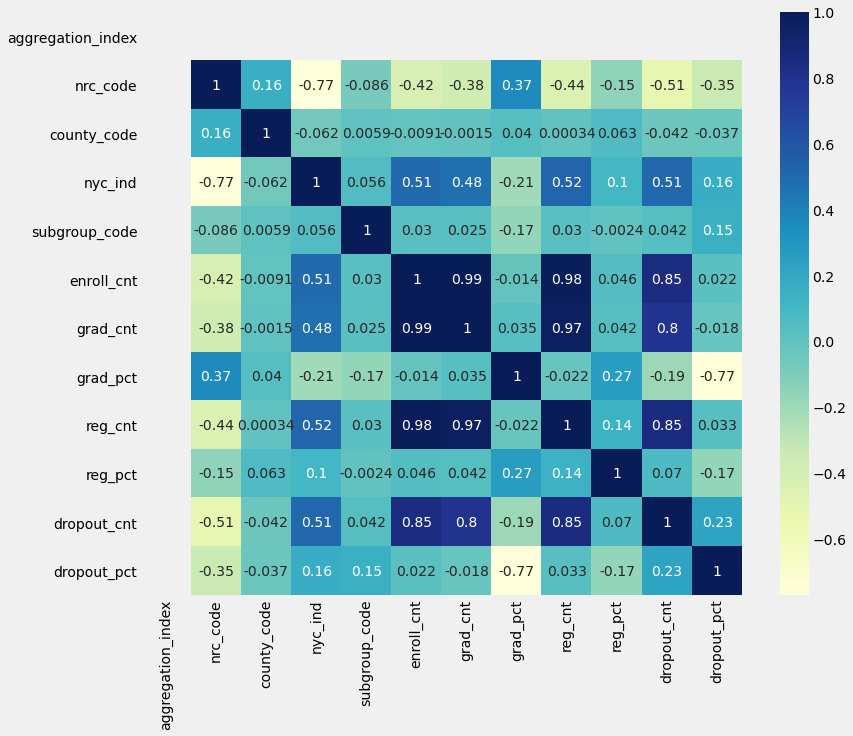

In [194]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the features.

In [195]:
df["report_school_year"].unique() # data is only for the year 2018-19 

array(['2018-19'], dtype=object)

only 1, can be removed

In [196]:
df["subgroup_name"].unique() #Text description of student subgrouping

array(['All Students', 'Female', 'Male', 'Black', 'Hispanic',
       'Asian/Pacific Islander', 'White', 'General Education Students',
       'Students with Disabilities', 'Not English Language Learner',
       'English Language Learner', 'Economically Disadvantaged',
       'Not Economically Disadvantaged', 'Homeless', 'Not Homeless',
       'Formerly English Language Learner', 'Multiracial',
       'American Indian/Alaska Native', 'Migrant', 'Not Migrant',
       'In Foster Care', 'Not in Foster Care', 'Parent in Armed Forces',
       'Parent Not in Armed Forces'], dtype=object)

In [197]:
len(pd.unique(df["subgroup_name"])) #count of student subgrouping name

24

In [198]:
len(pd.unique(df["subgroup_code"])) #count of student subgrouping code

24

Both correlate to each other hence one of them can be removed

<AxesSubplot:xlabel='count', ylabel='subgroup_name'>

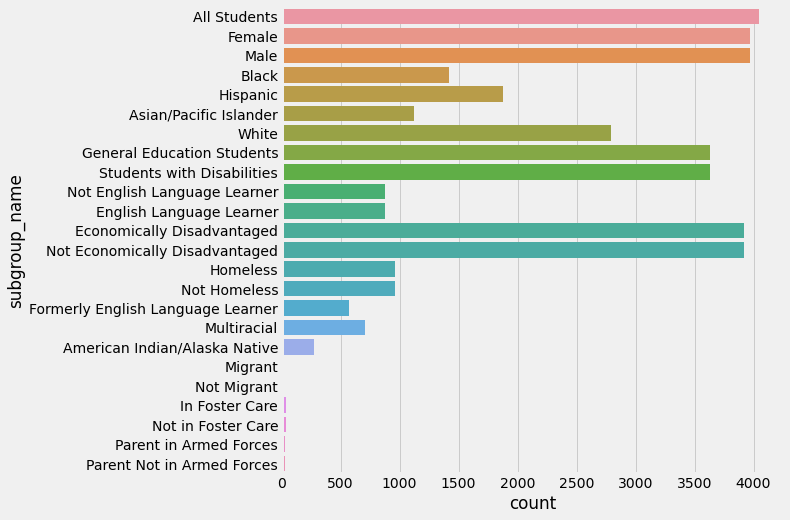

In [199]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, y='subgroup_name',ax=ax)

In [200]:
len(pd.unique(df["nrc_desc"])) #count of  the type of school district

6

In [201]:
df["nrc_desc"].unique() #Text description of the type of school district

array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='nrc_desc'>

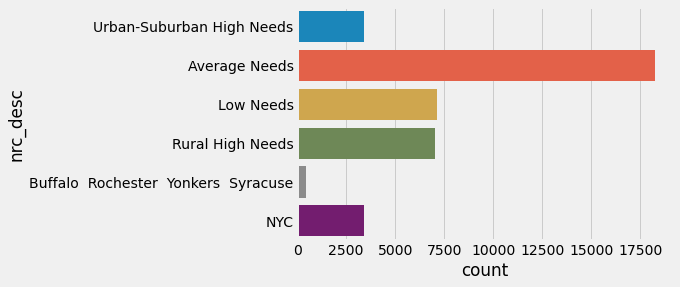

In [202]:
sns.countplot(data=df, y='nrc_desc')

In [203]:
len(pd.unique(df["nrc_code"]))

6

In [204]:
df['nrc_code'].value_counts()

5    18260
6     7136
4     7048
3     3412
1     3382
2      436
Name: nrc_code, dtype: int64

In [205]:
len(pd.unique(df["aggregation_name"])) #count of unique school names 

677

In [206]:
# pandas count distinct values in column
aggregation_namedf = df['aggregation_name'].value_counts()
aggregation_namedf

SYRACUSE CITY SCHOOL DISTRICT                         116
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #25                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 9                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #21                 108
                                                     ... 
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT          4
FISHERS ISLAND UNION FREE SCHOOL DISTRICT               4
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT      2
LONG LAKE CENTRAL SCHOOL DISTRICT                       2
BERKSHIRE UNION FREE SCHOOL DISTRICT                    2
Name: aggregation_name, Length: 677, dtype: int64

In [207]:
len(pd.unique(df["county_name"])) #count of applicable NY State county

62

In [208]:
len(pd.unique(df["aggregation_type"])) #count of unique aggregation type

1

Only 1, Can be removed 

In [209]:
len(pd.unique(df["aggregation_index"])) #count of unique aggregation index

1

Only 1, Can be removed 

In [210]:
len(pd.unique(df["nyc_ind"])) #count of unique aggregation index

2

In [211]:
df["nyc_ind"].unique()

array([0, 1])

In [212]:
df["membership_desc"].unique()

array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

In [213]:
#removing “reg_pct” and “reg_cnt” attributes from the dataframe
df = df.drop(columns=['reg_pct', 'reg_cnt', 'dropout_cnt', 'grad_cnt', 'report_school_year', 'aggregation_index', 'aggregation_type', 'nrc_desc', 'county_code', 'subgroup_name'])

In [214]:
df.head() #sanity check

,aggregation_name,nrc_code,county_name,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_pct,dropout_pct,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,658,71.0,22.0,medium
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,324,76.0,20.0,medium
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,334,65.0,25.0,medium
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,367,68.0,25.0,medium
5,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,98,59.0,29.0,medium


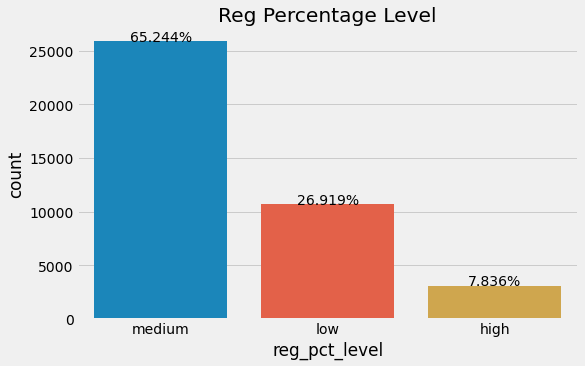

In [215]:
# count plot on single categorical variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'reg_pct_level', data = df)
plt.title('Reg Percentage Level')
#display the percentage above the bar 
total = len(df['reg_pct_level'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

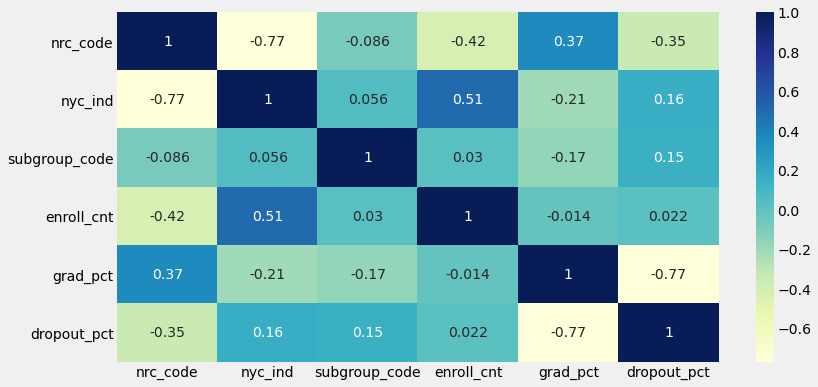

In [216]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the features.

array([[<AxesSubplot:title={'center':'enroll_cnt'}>]], dtype=object)

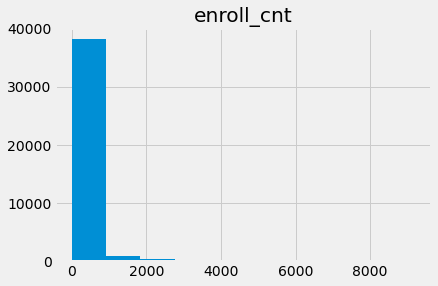

In [217]:
df.hist(column='enroll_cnt')

array([[<AxesSubplot:title={'center':'grad_pct'}>]], dtype=object)

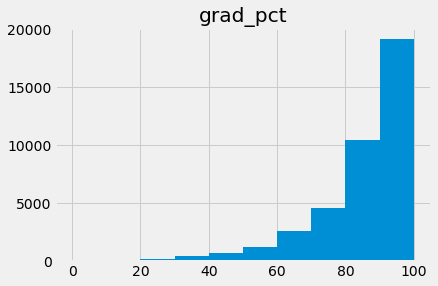

In [218]:
df.hist(column='grad_pct')

array([[<AxesSubplot:title={'center':'dropout_pct'}>]], dtype=object)

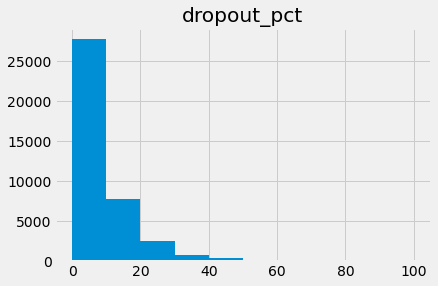

In [219]:
df.hist(column='dropout_pct')

In [220]:
# importing power_transform for normalization of numerical values 
from sklearn.preprocessing import power_transform

In [221]:
df2 = df[['enroll_cnt','grad_pct','dropout_pct']].copy() #making new dataframe fro standardization of numeric variables

In [222]:
# columns to list 
numericsc = list(df2.columns)

In [223]:
#normalizing numeric variables
standardized_data = pd.DataFrame(power_transform(df2[numericsc]), columns = numericsc)
standardized_data

,enroll_cnt,grad_pct,dropout_pct
0,1.556674,-1.203165,1.382375
1,1.117188,-0.905171,1.290762
2,1.136630,-1.494472,1.506749
3,1.196556,-1.357296,1.506749
4,0.309499,-1.722803,1.653244
...,...,...,...
39669,-0.430522,-1.307864,1.506749
39670,-0.212331,0.250897,0.655759
39671,-1.231135,-2.261979,2.122271
39672,-0.497330,-1.256503,1.337539


array([[<AxesSubplot:title={'center':'enroll_cnt'}>]], dtype=object)

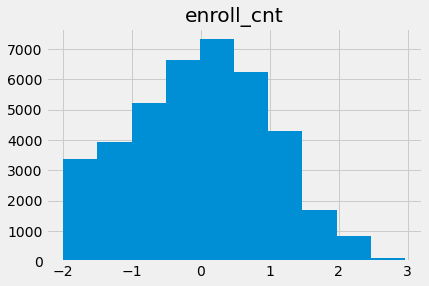

In [224]:
standardized_data.hist(column='enroll_cnt') #sanity check

array([[<AxesSubplot:title={'center':'grad_pct'}>]], dtype=object)

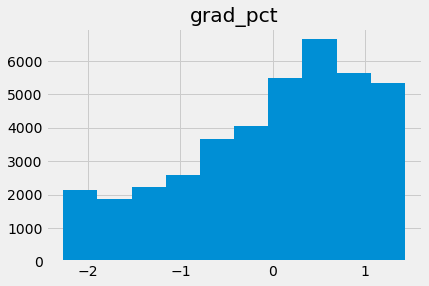

In [225]:
standardized_data.hist(column='grad_pct') #sanity check

array([[<AxesSubplot:title={'center':'dropout_pct'}>]], dtype=object)

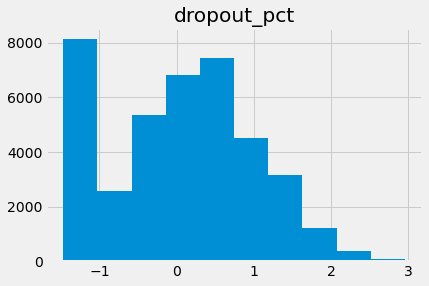

In [226]:
standardized_data.hist(column='dropout_pct') #sanity check

In [227]:
#creating new df to add the normalized data to it which can be used for modeling 
df3 = df[['aggregation_name', 'nrc_code', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code', 'reg_pct_level']].copy()

In [228]:
df3.head()

,aggregation_name,nrc_code,county_name,nyc_ind,membership_desc,subgroup_code,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,medium
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,medium
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,medium
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,medium
5,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,medium


In [229]:
df4 = pd.concat([standardized_data, df3], axis=1, join='inner') #joining the dataframes

In [230]:
df4.head() 

,enroll_cnt,grad_pct,dropout_pct,aggregation_name,nrc_code,county_name,nyc_ind,membership_desc,subgroup_code,reg_pct_level
0,1.556674,-1.203165,1.382375,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,medium
1,1.117188,-0.905171,1.290762,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,medium
2,1.136630,-1.494472,1.506749,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,medium
4,0.309499,-1.722803,1.653244,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,medium
5,-0.244340,-0.391408,1.136820,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,medium


In [231]:
#Assign 1,2,3 for low, medium and high values respectively in reg_pct_level column of dataset 
df4['reg_pct_level'] = df4['reg_pct_level'].map({'low': 1, 'medium': 2, 'high':3}) 

In [232]:
# Creating dummy variables from categorical columns:
newdf = pd.get_dummies(df4, columns=['aggregation_name','county_name','membership_desc'])
newdf.head() #first dataframe for modeling 

,enroll_cnt,grad_pct,dropout_pct,nrc_code,nyc_ind,subgroup_code,reg_pct_level,aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT,aggregation_name_AFTON CENTRAL SCHOOL DISTRICT,aggregation_name_AKRON CENTRAL SCHOOL DISTRICT,...,county_name_ONEIDA,county_name_ONONDAGA,county_name_QUEENS,county_name_RICHMOND,membership_desc_2013 Total Cohort - 6 Year Outcome,membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019,membership_desc_2014 Total Cohort - 5 Year Outcome,membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019,membership_desc_2015 Total Cohort - 4 Year Outcome,membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019
0,1.556674,-1.203165,1.382375,3,0,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.117188,-0.905171,1.290762,3,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.136630,-1.494472,1.506749,3,0,3,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.309499,-1.722803,1.653244,3,0,5,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,-0.244340,-0.391408,1.136820,3,0,6,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [233]:
df.head()

,aggregation_name,nrc_code,county_name,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_pct,dropout_pct,reg_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,658,71.0,22.0,medium
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,324,76.0,20.0,medium
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,334,65.0,25.0,medium
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,367,68.0,25.0,medium
5,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,2013 Total Cohort - 6 Year Outcome,6,98,59.0,29.0,medium


In [234]:
#Assign 1,2,3 for low, medium and high values respectively in reg_pct_level column of dataset 
df['reg_pct_level'] = df['reg_pct_level'].map({'low': 1, 'medium': 2, 'high':3}) 

In [235]:
# Creating dummy variables from categorical columns:
newdf2 = pd.get_dummies(df, columns=['county_name'])
newdf2 = newdf2.drop(columns=['aggregation_name', 'membership_desc']) #dropping these two columns 
newdf2.head()  #second data frame for modeling 

,nrc_code,nyc_ind,subgroup_code,enroll_cnt,grad_pct,dropout_pct,reg_pct_level,county_name_ALBANY,county_name_ALLEGANY,county_name_BRONX,...,county_name_SULLIVAN,county_name_TIOGA,county_name_TOMPKINS,county_name_ULSTER,county_name_WARREN,county_name_WASHINGTON,county_name_WAYNE,county_name_WESTCHESTER,county_name_WYOMING,county_name_YATES
0,3,0,1,658,71.0,22.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2,324,76.0,20.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,3,334,65.0,25.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,5,367,68.0,25.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,6,98,59.0,29.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Decision Tree + Random Forest Modeling

In [236]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

#### Decision Tree 

##### model 1 

In [237]:
X1 = newdf.drop(['reg_pct_level'], axis=1)

In [238]:
y1 = newdf['reg_pct_level']

In [239]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.33, random_state = 42)

In [240]:
encoder = OrdinalEncoder(cols=['enroll_cnt', 'grad_pct', 'dropout_pct', 'nrc_code', 'nyc_ind', 'subgroup_code'])
X_train1 = encoder.fit_transform(X_train1)

X_test1 = encoder.transform(X_test1)

In [241]:
from sklearn.tree import DecisionTreeClassifier
clf_en1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en1.fit(X_train1, y_train1)
y_pred_en1 = clf_en1.predict(X_test1)

In [276]:
# Calculate the absolute errors
errors4 = abs(y_pred_en1  - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors4), 2))

Mean Absolute Error: 0.27


Model accuracy score with criterion entropy: 0.7393


[Text(0.5, 0.875, 'x[3] <= 1.5\nentropy = 1.15\nsamples = 14530\nvalue = [3983, 9660, 887]'),
 Text(0.25, 0.625, 'x[5] <= 1.5\nentropy = 1.118\nsamples = 1856\nvalue = [1175, 614, 67]'),
 Text(0.125, 0.375, 'x[267] <= 0.5\nentropy = 0.939\nsamples = 163\nvalue = [21, 129, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.885\nsamples = 159\nvalue = [17, 129, 13]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.375, 0.375, 'x[24] <= 0.5\nentropy = 1.052\nsamples = 1693\nvalue = [1154, 485, 54]'),
 Text(0.3125, 0.125, 'entropy = 1.013\nsamples = 1626\nvalue = [1149, 428, 49]'),
 Text(0.4375, 0.125, 'entropy = 0.757\nsamples = 67\nvalue = [5, 57, 5]'),
 Text(0.75, 0.625, 'x[5] <= 1.5\nentropy = 1.085\nsamples = 12674\nvalue = [2808, 9046, 820]'),
 Text(0.625, 0.375, 'x[3] <= 3.5\nentropy = 1.113\nsamples = 1132\nvalue = [706, 390, 36]'),
 Text(0.5625, 0.125, 'entropy = 1.19\nsamples = 890\nvalue = [488, 366, 36]'),
 Text(0.6875, 0.125, 'entropy = 0.466\nsamples = 2

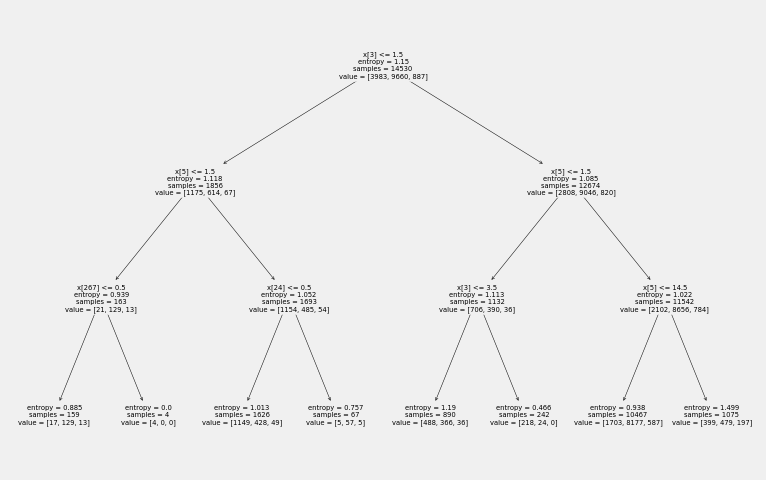

In [242]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test1, y_pred_en1)))
y_pred_train_en1 = clf_en1.predict(X_train1)
y_pred_train_en1
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en1.fit(X_train1, y_train1))

In [243]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred_en1)
cm1

array([[ 968, 1021,    0],
       [ 441, 4323,    0],
       [  40,  364,    0]])

##### model 2 

In [244]:
X2 = newdf2.drop(['reg_pct_level'], axis=1)

In [245]:
y2 = newdf2['reg_pct_level']

In [246]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.33, random_state = 42)

In [247]:
encoder = OrdinalEncoder(cols=['enroll_cnt', 'grad_pct', 'dropout_pct', 'nrc_code', 'nyc_ind', 'subgroup_code'])
X_train2 = encoder.fit_transform(X_train2)

X_test2 = encoder.transform(X_test2)

In [248]:
clf_en2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en2.fit(X_train2, y_train2)
y_pred_en2 = clf_en2.predict(X_test2)

In [275]:
# Calculate the absolute errors
errors3 = abs(y_pred_en2  - y_test2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors3), 2))

Mean Absolute Error: 0.33


Model accuracy score with criterion entropy: 0.6788


[Text(0.5, 0.875, 'x[65] <= 0.5\nentropy = 1.199\nsamples = 26581\nvalue = [7113, 17375, 2093]'),
 Text(0.25, 0.625, 'x[4] <= 64.5\nentropy = 1.121\nsamples = 24752\nvalue = [6797, 16650, 1305]'),
 Text(0.125, 0.375, 'x[5] <= 2.5\nentropy = 1.107\nsamples = 24267\nvalue = [6343, 16619, 1305]'),
 Text(0.0625, 0.125, 'entropy = 1.378\nsamples = 5408\nvalue = [1799, 2944, 665]'),
 Text(0.1875, 0.125, 'entropy = 0.997\nsamples = 18859\nvalue = [4544, 13675, 640]'),
 Text(0.375, 0.375, 'x[4] <= 79.5\nentropy = 0.343\nsamples = 485\nvalue = [454, 31, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.449\nsamples = 331\nvalue = [300, 31, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 154\nvalue = [154, 0, 0]'),
 Text(0.75, 0.625, 'x[4] <= 39.5\nentropy = 1.49\nsamples = 1829\nvalue = [316, 725, 788]'),
 Text(0.625, 0.375, 'x[0] <= 3.5\nentropy = 1.417\nsamples = 1652\nvalue = [210, 657, 785]'),
 Text(0.5625, 0.125, 'entropy = 1.186\nsamples = 456\nvalue = [31, 295, 130]'),
 Text(0.6875, 0.125, 'e

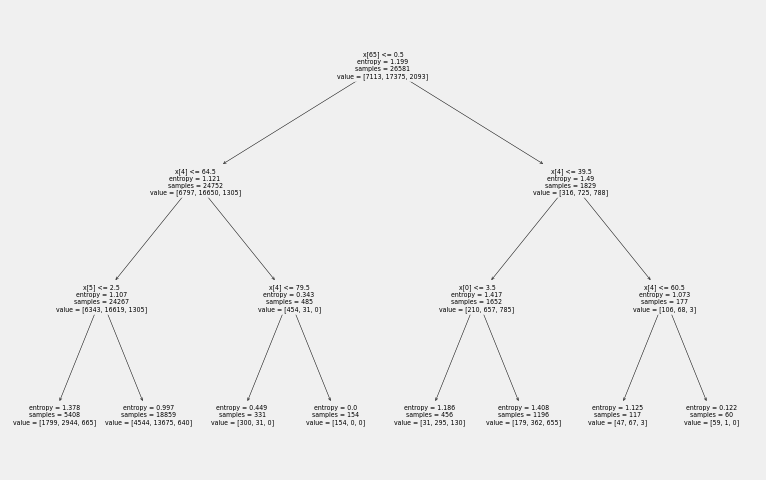

In [249]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test2, y_pred_en2)))
y_pred_train_en2 = clf_en2.predict(X_train2)
y_pred_train_en2
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en2.fit(X_train2, y_train2))

In [250]:
cm2 = confusion_matrix(y_test2, y_pred_en2)
cm2

array([[ 273, 3207,   87],
       [  16, 8319,  175],
       [   0,  721,  295]])

#### Random Forest

##### Model 1

In [251]:
feature_list1 = list(X1.columns) #for future use

In [252]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [253]:
# Instantiate model with 1000 decision trees
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf1.fit(X_train1, y_train1);

In [254]:
# Use the forest's predict method on the test data
predictions1 = rf1.predict(X_test1)
# Calculate the absolute errors
errors1 = abs(predictions1 - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors1), 2))

Mean Absolute Error: 0.23


In [255]:
# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (errors1 / y_test1)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape1)
print('Accuracy:', round(accuracy1, 2), '%')

Accuracy: 84.63 %


In [256]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tre1 = rf1.estimators_[5]
# Export the image to a dot file
export_graphviz(tre1, out_file = 'tree.dot', feature_names = feature_list1, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [259]:
text_representation1 = tree.export_text(tre1)
print(text_representation1)

|--- feature_3 <= 1.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_294 <= 0.50
|   |   |   |--- feature_37 <= 0.50
|   |   |   |   |--- feature_267 <= 0.50
|   |   |   |   |   |--- feature_388 <= 0.50
|   |   |   |   |   |   |--- feature_291 <= 0.50
|   |   |   |   |   |   |   |--- feature_95 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 52.50
|   |   |   |   |   |   |   |   |   |--- feature_345 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_251 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_251 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- feature_345 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 23.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  23.00
|   |   |   |   |   |   |   |   |   |   |   |--- value:

In [262]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: subgroup_code        Importance: 0.22
Variable: nrc_code             Importance: 0.1
Variable: enroll_cnt           Importance: 0.07
Variable: grad_pct             Importance: 0.06
Variable: dropout_pct          Importance: 0.05
Variable: county_name_MONROE   Importance: 0.03
Variable: membership_desc_2013 Total Cohort - 6 Year Outcome Importance: 0.02
Variable: membership_desc_2015 Total Cohort - 4 Year Outcome Importance: 0.02
Variable: nyc_ind              Importance: 0.01
Variable: aggregation_name_BALDWIN UNION FREE SCHOOL DISTRICT Importance: 0.01
Variable: aggregation_name_JAMESVILLE-DEWITT CENTRAL SCHOOL DISTRICT Importance: 0.01
Variable: aggregation_name_MILLBROOK CENTRAL SCHOOL DISTRICT Importance: 0.01
Variable: county_name_NASSAU   Importance: 0.01
Variable: membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019 Importance: 0.01
Variable: membership_desc_2014 Total Cohort - 5 Year Outcome Importance: 0.01
Variable: membership_desc_2014 Total Cohort - 5 

We can observe that "subgroup_code" , "nrc_code" has the highest importance compared to other variables in our training dataset

##### Model 2

In [264]:
feature_list2 = list(X2.columns) #for future use

In [265]:
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf2.fit(X_train2, y_train2);

In [266]:
# Use the forest's predict method on the test data
predictions2 = rf2.predict(X_test2)
# Calculate the absolute errors
errors2 = abs(predictions2 - y_test2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2))

Mean Absolute Error: 0.2


In [267]:
# Calculate mean absolute percentage error (MAPE)
mape2 = 100 * (errors2 / y_test2)
# Calculate and display accuracy
accuracy2 = 100 - np.mean(mape2)
print('Accuracy:', round(accuracy2, 2), '%')

Accuracy: 86.61 %


In [269]:
# Pull out one tree from the forest
tre2 = rf2.estimators_[5]
# Export the image to a dot file
export_graphviz(tre2, out_file = 'tree2.dot', feature_names = feature_list2, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree2.dot')

In [270]:
text_representation2 = tree.export_text(tre2)
print(text_representation2)

|--- feature_65 <= 0.50
|   |--- feature_4 <= 64.50
|   |   |--- feature_35 <= 0.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_57 <= 0.50
|   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_44 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_44 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |   |--- feature_28 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 6.00
|   |   |   |   |  

### Results: 

#### Model - Random Forest 

Model 1 | MAE - 0.23 | Accuracy - 84.63%

Model 2 | MAE - 0.2  | Accuracy - 86.61%

#### Model - Decision Tree

Model 1 | MAE - 0.27 | Model accuracy score with criterion entropy: 0.7393

Model 2 | MAE - 0.33 | Model accuracy score with criterion entropy: 0.6788

### Conclusion :

Successfully completed the steps assigned for this assignment. From the results above we can see that the model with highest accuracy(86.61%) and lowest MAE(0.2) is Model 2 of Random Forest.

#### References :
- https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://mljar.com/blog/visualize-decision-tree/